### Task 1 - Scraping

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash.dependencies import Input, Output



def fetch_stock_prices(file, start, end):
    data = yf.download(file, start=start, end=end)
    #Rest the index to make 'Date' a column.
    data.reset_index(inplace=True)
    # Save without index
    data.to_csv(f'{file}_stock_prices.csv', index=False)
    return data

# Apply stock, start date, end date.
files =['SHEL.L','VOD.L','RKT.L','ULVR.L','DGE.L']
start_date = "2022-06-01"
end_date = "2023-12-31"

#Fetch stock prices of the campany  and store them in directory
df_s={}
for file in files:
    df = fetch_stock_prices(file, start_date, end_date)
    print(f"Company:{file}")
    print(df)
    df_s[file] = df

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Company:SHEL.L
          Date    Open         High          Low   Close    Adj Close  \
0   2022-06-01  2361.5  2390.000000  2357.000000  2361.0  2202.736328   
1   2022-06-06  2379.5  2423.500000  2374.000000  2394.5  2233.990723   
2   2022-06-07  2399.0  2426.500000  2391.259033  2416.0  2254.049316   
3   2022-06-08  2424.5  2450.879883  2414.500000  2440.0  2276.440674   
4   2022-06-09  2439.5  2459.235107  2395.500000  2395.5  2234.923584   
..         ...     ...          ...          ...     ...          ...   
392 2023-12-21  2556.0  2576.000000  2545.000000  2557.0  2529.458984   
393 2023-12-22  2559.5  2577.500000  2555.000000  2566.5  2538.856689   
394 2023-12-27  2567.5  2585.500000  2551.000000  2556.0  2528.469727   
395 2023-12-28  2548.5  2565.554932  2538.000000  2549.0  2521.545166   
396 2023-12-29  2542.0  2571.500000  2521.500000  2571.5  2543.802979   

       Volume  
0    21562120  
1    20531283  
2    21689744  
3    27992220  
4    44141701  
..        ..


[*********************100%%**********************]  1 of 1 completed


Company:RKT.L
          Date    Open    High     Low   Close    Adj Close   Volume
0   2022-06-01  6178.0  6308.0  6160.0  6180.0  5927.386230  1715128
1   2022-06-06  6296.0  6296.0  6176.0  6222.0  5967.669922  1217596
2   2022-06-07  6244.0  6246.0  6174.0  6194.0  5940.814453  2623543
3   2022-06-08  6194.0  6206.0  6104.0  6126.0  5875.593750  1225968
4   2022-06-09  6092.0  6174.0  6054.0  6068.0  5819.964355  2470854
..         ...     ...     ...     ...     ...          ...      ...
393 2023-12-21  5408.0  5456.0  5378.0  5426.0  5426.000000  1161180
394 2023-12-22  5410.0  5464.0  5410.0  5442.0  5442.000000   769480
395 2023-12-27  5430.0  5484.0  5426.0  5464.0  5464.000000   781130
396 2023-12-28  5464.0  5476.0  5432.0  5446.0  5446.000000   543380
397 2023-12-29  5440.0  5458.0  5420.0  5420.0  5420.000000   379922

[398 rows x 7 columns]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Company:ULVR.L
          Date    Open    High          Low   Close    Adj Close   Volume
0   2022-06-01  3832.0  3832.0  3694.500000  3705.0  3476.757080  7073513
1   2022-06-06  3729.0  3742.0  3705.000000  3718.0  3488.956055  3682917
2   2022-06-07  3718.0  3725.0  3683.000000  3696.0  3468.311035  3596230
3   2022-06-08  3719.5  3719.5  3655.719971  3677.5  3450.951172  7822539
4   2022-06-09  3666.5  3703.0  3621.000000  3638.0  3413.884521  8550693
..         ...     ...     ...          ...     ...          ...      ...
392 2023-12-21  3777.0  3812.0  3766.500000  3779.0  3745.008057  4689376
393 2023-12-22  3776.5  3791.5  3769.500000  3787.0  3752.936279   939491
394 2023-12-27  3778.5  3810.0  3767.000000  3787.5  3753.431641  1517415
395 2023-12-28  3796.5  3816.5  3785.000000  3812.5  3778.206787  1538803
396 2023-12-29  3813.5  3822.5  3780.000000  3800.0  3765.819336  1028067

[397 rows x 7 columns]
Company:DGE.L
          Date    Open         High     Low   Close    Adj 

### Task 2.1 - Exploratory  Analysis

In [3]:
#Checking missing values
for file, df in df_s.items():
    print(f"{file}   shape {df.shape} :\n{df.isnull().sum()}\n")

SHEL.L   shape (397, 7) :
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

VOD.L   shape (397, 7) :
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

RKT.L   shape (398, 7) :
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

ULVR.L   shape (397, 7) :
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

DGE.L   shape (398, 7) :
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



In [4]:
#Creating a single dataframe containing only close prices for each company
df = pd.concat([df_s['SHEL.L']['Close'], df_s['VOD.L']['Close'], df_s['RKT.L']['Close'], df_s['ULVR.L']['Close'], df_s['DGE.L']['Close']] , axis=1)
df.columns = files
df.dropna(inplace=True)

In [5]:
skew = []
for stock in files:
    skew.append(df[stock].skew())

In [6]:
#Data structure for close prices
table = df.describe()
table.loc['skew'] = skew
round(table,2)

SHEL.L   VOD.L    RKT.L   ULVR.L    DGE.L
count   397.00  397.00   397.00   397.00   397.00
mean   2383.37   91.76  5957.57  4027.62  3468.80
std     158.01   18.14   336.62   169.44   291.92
min    1936.40   64.72  5328.00  3553.50  2740.00
25%    2299.50   75.17  5742.00  3924.00  3306.50
50%    2366.50   90.37  5896.00  4033.50  3547.50
75%    2489.00  101.64  6222.00  4135.00  3675.50
max    2772.50  131.00  6808.00  4443.50  3960.00
skew     -0.04    0.63     0.43    -0.12    -0.79

### Task 2.2 - Dashboard for Close Prices and  Return of Stocks

In [7]:
#Starting the Dash Application
app = Dash(__name__)

#Define the Boundaries of Dash Application
app.layout = html.Div([
    html.H1("Stock Prices"),
    dcc.Dropdown(
    id='stock-dropdown',
    options=[{'label': file, 'value': file} for file in files],value = files[0]), #Initial Value
    dcc.Graph(id = 'stock-graph')])

# Define and callback to update the Graph based on selected Dropdown
@app.callback(Output('stock-graph','figure'),[Input('stock-dropdown','value')])
def update_graph(selected_stock):
    selected_df = df_s[selected_stock]
    selected_df_styled = selected_df.style.set_table_styles([{'selector': 'table', 'props': [('border', 'solid 1px')]}])
    
    return {
        'data': [go.Scatter(x=selected_df['Date'], y=selected_df['Close'], mode='lines', line=dict(color='green'))],
        'layout': go.Layout(
            title=f'Closing Prices Over Time {selected_stock}',
            xaxis={'title': 'Date'},
            yaxis={'title': 'Close Price'},
            hovermode='closest'
        )
    }

    
# Runs the Dash Application
if __name__ == '__main__':
    app.run_server(debug=True)

In [8]:
# Define the companies
companies = ['SHEL.L', 'VOD.L', 'RKT.L', 'ULVR.L', 'DGE.L']
start_date = "2022-06-01"
end_date = "2023-12-31"

# Fetch stock data for each company
dfs = {}
for company in companies:
    data = yf.download(company, start=start_date, end=end_date)
    dfs[company] = data['Close']


# Create an interactive plot
fig = go.Figure()

# Add lines for each company
for company in companies:
    fig.add_trace(go.Scatter(
        x=dfs[company].index,
        y=dfs[company],
        mode='lines',
        name=company,
        hovertemplate='<b>%{x}</b><br>%{y:.2f}',
    ))

# Update the layout
fig.update_layout(
    title='Closing Prices of 5 Companies from June 1, 2022, to December 31, 2023',
    xaxis_title='Date',
    yaxis_title='Close Price (£)',
    hovermode='x'
)

# Add mouse interaction
fig.update_traces(hoverinfo='x+y')
fig.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


_____________________________________________________________________________________________________________________
Total returns of each stock over the 1.5 year period:
SHEL.L : 8.92%
VOD.L : -45.89%
RKT.L : -12.3%
ULVR.L : 2.56%
DGE.L : -21.15%
_____________________________________________________________________________________________________________________
The worst performing company is ̲VOD.L with a total cumulative return of -45.89%
The best performing company is ̲SHEL.L with a total cumulative return of 8.92%
_____________________________________________________________________________________________________________________


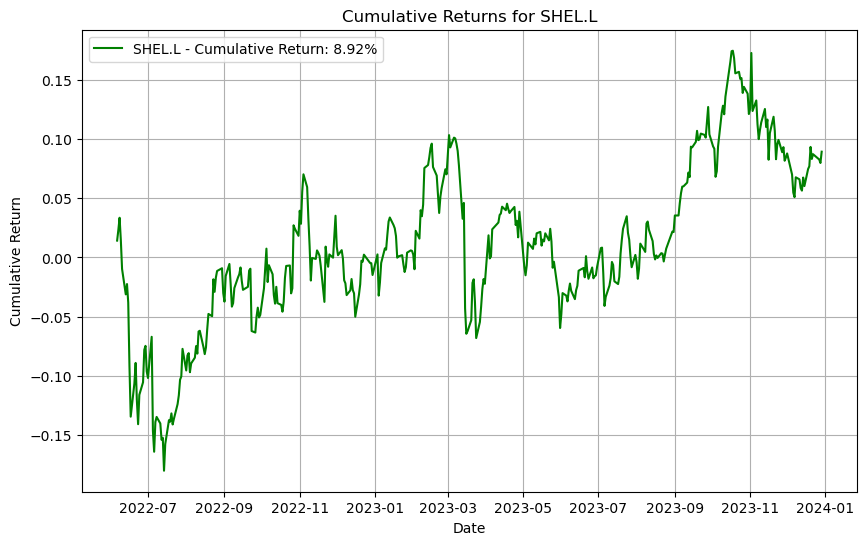

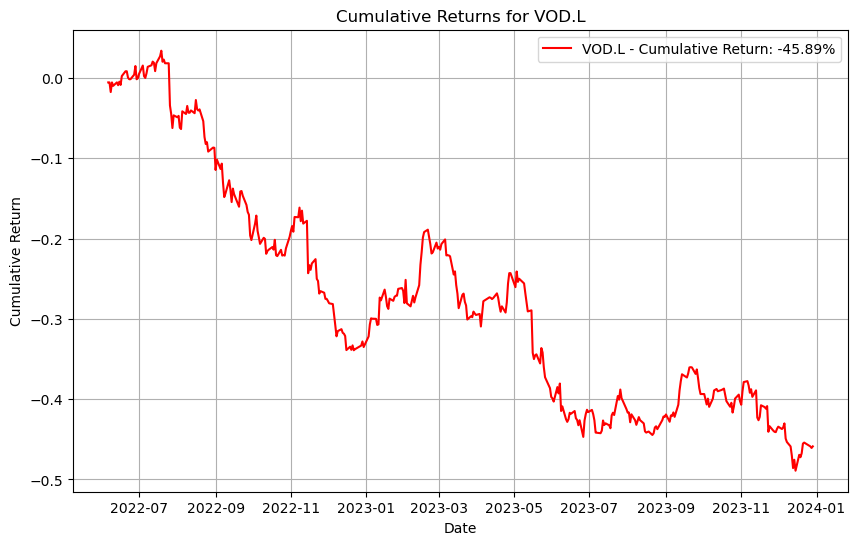

In [9]:
# Calculate returns for each company
df_returns=pd.DataFrame()
#Daily returns for each company
for file, df in df_s.items():
    df['Daily_Return'] = df['Close'].pct_change()
    df_returns[file] = df['Close'].pct_change()


# Calculate cumulative returns for each company
for file, df in df_s.items():
	df['Cumulative_Return'] = (1+ df['Daily_Return']).cumprod() - 1

# Calculate total cumulative return for each company
total_cumulative_returns = {file: df['Cumulative_Return'].iloc[-1] for file, df in df_s.items()}

# Find the company with the worst cumulative return
worst_company = min(total_cumulative_returns, key=total_cumulative_returns.get)
worst_cumulative_return = total_cumulative_returns[worst_company]

# Find the company with the best cumulative return
best_company = max(total_cumulative_returns, key=total_cumulative_returns.get)
best_cumulative_return = total_cumulative_returns[best_company]

print("_____________________________________________________________________________________________________________________")
print('Total returns of each stock over the 1.5 year period:')
for i in total_cumulative_returns:
    print(f"{i} : {round(total_cumulative_returns[i]*100,2)}%")
print("_____________________________________________________________________________________________________________________")
print(f"The worst performing company is \033[91m\u0332{worst_company}\033[0m with a total cumulative return of \033[91m{worst_cumulative_return:.2%}\033[0m")
print(f"The best performing company is \033[91m\u0332{best_company}\033[0m with a total cumulative return of \033[92m{best_cumulative_return:.2%}\033[0m")
print("_____________________________________________________________________________________________________________________")

# Plot the cumulative returns for the best performing company
plt.figure(figsize=(10, 6))
plt.plot(df_s[best_company]['Date'], df_s[best_company]['Cumulative_Return'], label=f'{best_company} - Cumulative Return: {best_cumulative_return:.2%}', color='green')
plt.title(f'Cumulative Returns for {best_company}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot the cumulative returns for the worst performing company
plt.figure(figsize=(10, 6))
plt.plot(df_s[worst_company]['Date'], df_s[worst_company]['Cumulative_Return'], label=f'{worst_company} - Cumulative Return: {worst_cumulative_return:.2%}', color='red')
plt.title(f'Cumulative Returns for {worst_company}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()


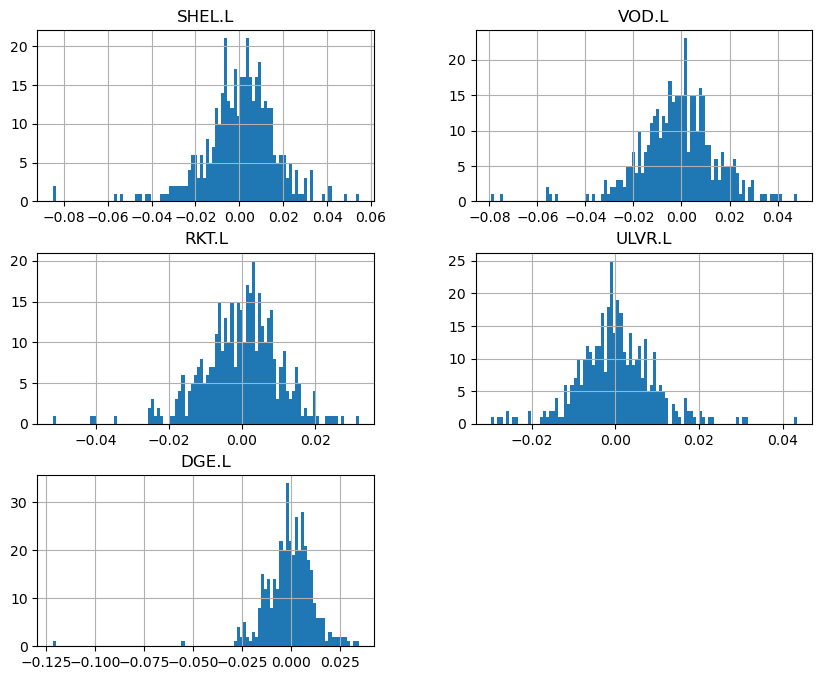

In [10]:
#Histogram shows the distribution of daily returns for each stock over time 
df_returns.hist(figsize=(10, 8), bins=100) #using histogram to plot returns 
plt.show()

The daily return distributions show that most of the daily returns across different companies were centered around 0 with SHEL.L ranging from ~ -0.08 to ~0.05, VOD.L from ~ -0.08 to ~0.05, RKT.L from ~ -0.05 to ~0.03, ULVR.L from ~ -0.03 to ~0.04, and DGE.L from ~ -0.125 to ~0.025

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


_____________________________________________________________________________________________________________________


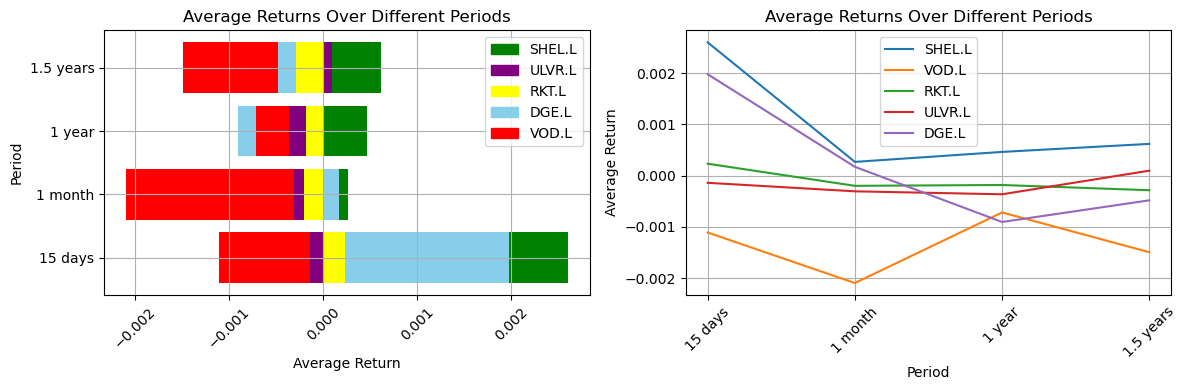

_____________________________________________________________________________________________________________________
The worst performing company is ̲VOD.L with an average return of -0.14%
The best performing company is ̲SHEL.L with an average return of 0.10%
_____________________________________________________________________________________________________________________


In [11]:
# Initialize an empty DataFrame to store daily returns
daily_returns_df = pd.DataFrame()

# Scrape stock prices for the companies and calculate daily returns
for file in files:
    df = fetch_stock_prices(file, start_date, end_date)
    df[f'{file}_daily_return'] = df['Close'].pct_change()
    daily_returns_df = pd.concat([daily_returns_df, df[f'{file}_daily_return']], axis=1)

# Define function to calculate average return for a specified period
def calculate_average_return(df, period):
    if period == '15 days':
        return df.tail(15).mean()
    elif period == '1 month':
        return df.tail(30).mean()
    elif period == '1 year':
        return df.tail(252).mean()  # Assuming 252 trading days in a year
    elif period == '1.5 years':
        return df.tail(378).mean()  # Assuming 252 trading days in a year

# Initialize an empty DataFrame to store average returns
average_returns_df = pd.DataFrame()

# Calculate average returns for each period for each company
for period in ['15 days', '1 month', '1 year', '1.5 years']:
    average_returns_df[period] = daily_returns_df.apply(lambda x: calculate_average_return(x, period))

# Transpose the DataFrame for better readability
average_returns_df = average_returns_df.transpose()

# Rename the columns with company files
average_returns_df.columns = files

# Plotting the graph
plt.figure(figsize=(12, 4))

# Plot average returns with color boxes
ax1 = plt.subplot(1, 2, 1)
# for i, file in enumerate(files):
#     plt.barh(i, average_returns_df.loc['15 days', file], color='green', label=file)
#     plt.text(average_returns_df.loc['15 days', file], i, f'{file}', ha='left', va='center', fontsize=8)

# Create color boxes legend
handles = [plt.Rectangle((0,0),1,1, color='green', label='SHEL.L'),
           plt.Rectangle((0,0),1,1, color='purple', label='ULVR.L'),
           plt.Rectangle((0,0),1,1, color='yellow', label='RKT.L'),
           plt.Rectangle((0,0),1,1, color='skyblue', label='DGE.L'),
           plt.Rectangle((0,0),1,1, color='red', label='VOD.L')]

plt.legend(handles=handles, loc='upper right')

plt.title('Average Returns Over 15 Days')
plt.xlabel('Average Return')
plt.ylabel('Company')
# Plot cumulative returns
plt.subplot(1, 2, 1)

mask = average_returns_df.index == '1 year'

plt.barh(average_returns_df.index, average_returns_df['SHEL.L'], color='green')
# When plotting mean returns after 1 year, red and skyblue colours overlap, making red disappear from the graph completely
# Thus, the below 2 lines make the skyblue colour display first when index is 1 year as the value is bigger for the stock with skyblue colour
# In other cases, red is displayed first since the stock with red colour always have the lowest value except for 1 year index
plt.barh(average_returns_df.index, np.where(average_returns_df.index == '1 year', average_returns_df['DGE.L'], average_returns_df['VOD.L']), color=np.where(average_returns_df.index == '1 year', 'skyblue', 'red'))
plt.barh(average_returns_df.index, np.where(average_returns_df.index == '1 year', average_returns_df['VOD.L'], average_returns_df['DGE.L']), color=np.where(average_returns_df.index == '1 year', 'red', 'skyblue'))
plt.barh(average_returns_df.index, average_returns_df['ULVR.L'], color='purple')
plt.barh(average_returns_df.index, average_returns_df['RKT.L'], color='yellow')


plt.title('Average Returns Over Different Periods')
plt.xlabel('Average Return')
plt.ylabel('Period')
plt.xticks(rotation=45)
plt.grid(True)

# Plot average returns
plt.subplot(1, 2, 2)
for file in files:
    plt.plot(average_returns_df.index, average_returns_df[file], label=file)
plt.title('Average Returns Over Different Periods')
plt.xlabel('Period')
plt.ylabel('Average Return')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
print("_____________________________________________________________________________________________________________________")
plt.show()

print("_____________________________________________________________________________________________________________________")

# Find the company with the worst and best average return
worst_company = average_returns_df.mean().idxmin()
worst_average_return = average_returns_df.mean().min()

best_company = average_returns_df.mean().idxmax()
best_average_return = average_returns_df.mean().max()

print(f"The worst performing company is \033[91m\u0332{worst_company}\033[0m with an average return of \033[91m{worst_average_return:.2%}\033[0m")
print(f"The best performing company is \033[91m\u0332{best_company}\033[0m with an average return of \033[92m{best_average_return:.2%}\033[0m")
print("_____________________________________________________________________________________________________________________")


### Task 2.3 - Trading Strategy (RSI and Bollinger Bands)

Bollinger Bands

In [12]:
#Below method for finding Bollinger Bands was taken from : https://medium.com/@financial_python/how-to-plot-bollinger-bands-in-python-1d7cc95ad9af
for file, df in df_s.items():
    #Calculating simple moving average for 20 days
    df['SMA-20'] = df['Close'].rolling(window=20).mean()
    # Calculating standard deviation for the same 20 days 
    df['StandDev'] = df['Close'].rolling(window=20).std()
    # Calculating Bollinger Band upper and lower
    df['UpBand'] = df['SMA-20'] + (2 * df['StandDev'])
    df['LowBand'] = df['SMA-20'] - (2 * df['StandDev']) 
    

RSI

In [13]:
# Below method for calculating RSI was taken from:  https://www.quora.com/What-are-some-alternative-ways-to-calculate-RSI-values-in-Python-and-Pandas
# which uses 'rolling', because librabries coming with in-build RSI function provided different RSI results
for file, df in df_s.items():
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0)
    avg_gain = gain.rolling(window=14).mean() #Using 14 day window as suggested in the resources found
    loss = -delta.where(delta < 0, 0)
    avg_loss= loss.rolling(window=14).mean()
    df['RSI'] = 100 - (100 / (1 + (avg_gain / avg_loss) ))

In [14]:
def generating_buy_sell_signals_RSI_BB(df):
    for i, row in df.iterrows():        
        #Buy shares when RSI is below 30 and Close Price is either below Lower Band or is touching it. 
        if row['RSI'] < 30  and (row['LowBand'] == row['Close'] or row['LowBand'] > row['Close']):
            df.loc[i, ['RSI_BOL_signal']] = 1
        #Sell shares when RSI is above 70 and Close Price is either above Upper Band or is touching it. 
        elif  row['RSI'] > 70  and (row['UpBand'] == row['Close'] or row['UpBand'] < row['Close']):
            df.loc[i, ['RSI_BOL_signal']] = -1
        else:
            df.loc[i, ['RSI_BOL_signal']] = 0

In [15]:
def generating_buy_sell_signals_RSI(df):
    for i, row in df.iterrows():
        #Buy shares
        if row['RSI'] < 30 :
            df.loc[i, ['RSI_signal']] = 1
        #Sell shares
        elif  row['RSI'] > 70:
            df.loc[i, ['RSI_signal']] = -1
        else:
            df.loc[i, ['RSI_signal']] = 0

In [16]:
def generating_buy_sell_signals_Bol(df):
    for i, row in df.iterrows():
        #Buy shares
        if (row['LowBand'] == row['Close'] or row['LowBand'] > row['Close']):
            df.loc[i, ['BOL_signal']] = 1
        #Sell shares
        elif (row['UpBand'] == row['Close'] or row['UpBand'] < row['Close']):
            df.loc[i, ['BOL_signal']] = -1
        else:
            df.loc[i, ['BOL_signal']] = 0

In [17]:
#Generating trading signals while using RSI + Bollinger bands, RSI and Bollinger bands seperately
for file, df in df_s.items():
    generating_buy_sell_signals_RSI_BB(df)
    generating_buy_sell_signals_Bol(df)
    generating_buy_sell_signals_RSI(df)

In [ ]:
#Plotting RSI + Bollinger band trading signals for all companies
for file, df in df_s.items():
    
    df.dropna(inplace=True)
    fig, ax= plt.subplots(figsize=(16,5))
    plt.xlabel("Date")
    plt.ylabel("Close Price GBp")
    plt.title(f"Trading signals using RSI and Bollinger Bands for {file} ")

    ax.plot(df['Date'] , df['Close'],label='Close Price', alpha=1)
    ax.plot( df['Date'], df['UpBand'],label='UpBand', color='red', alpha=0.2)
    ax.plot(df['Date'], df['LowBand'],  label='LowBand', color='green', alpha=0.2)

    x_axis_buy = df['Close'][df['RSI_BOL_signal'] ==1]
    y_axis_buy = df.loc[df['RSI_BOL_signal'] == 1]['Date']

    x_axis_sell = df['Close'][df['RSI_BOL_signal'] ==-1]
    y_axis_sell = df.loc[df['RSI_BOL_signal'] == -1]['Date']

    ax.scatter(y_axis_buy, x_axis_buy, label = 'Buy',marker = '^', color ='green')
    ax.scatter(y_axis_sell,x_axis_sell, label = 'Sell',marker = 'v', color ='red')
    
    plt.legend()
    plt.show()

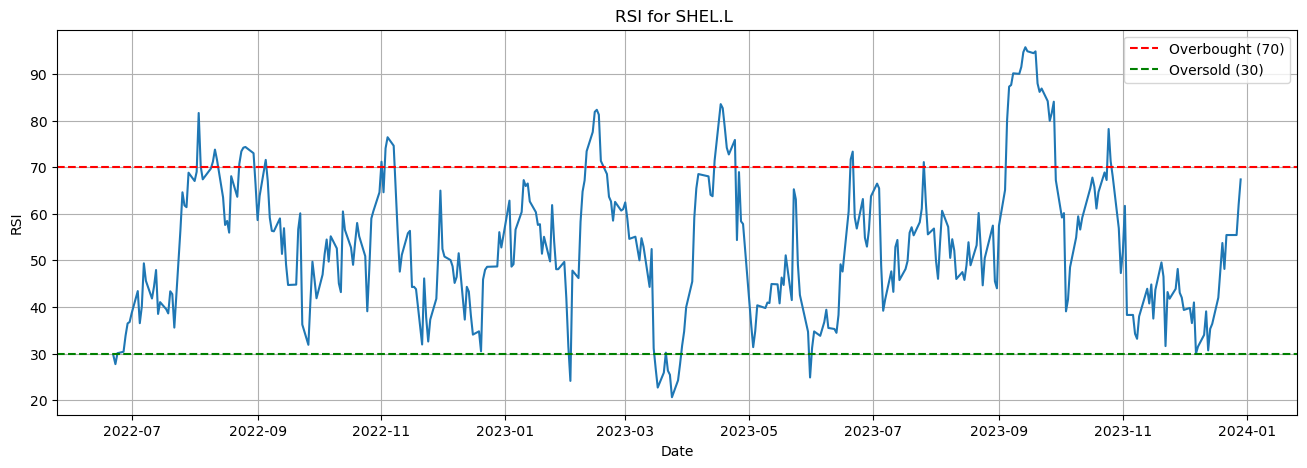

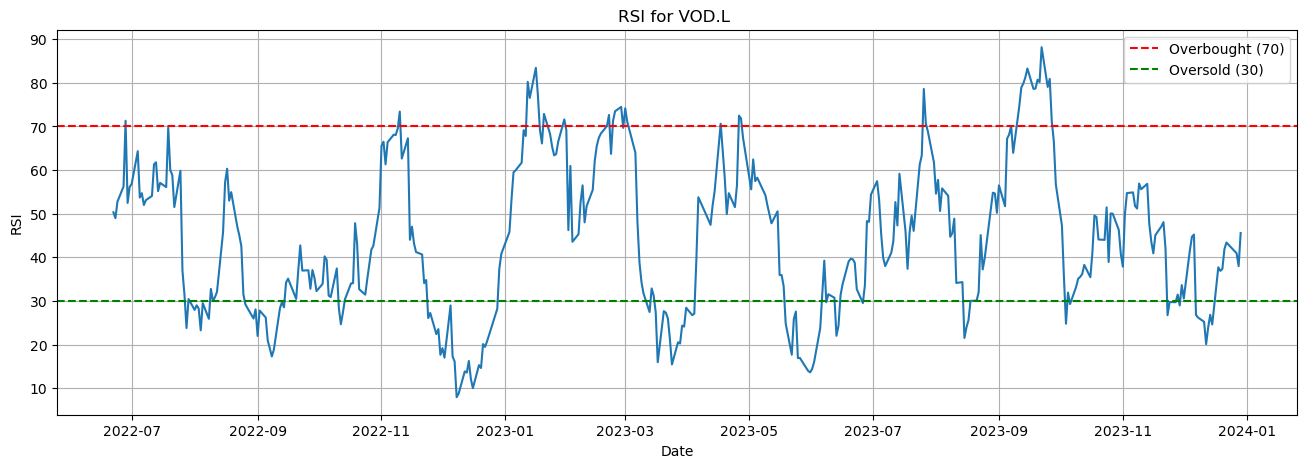

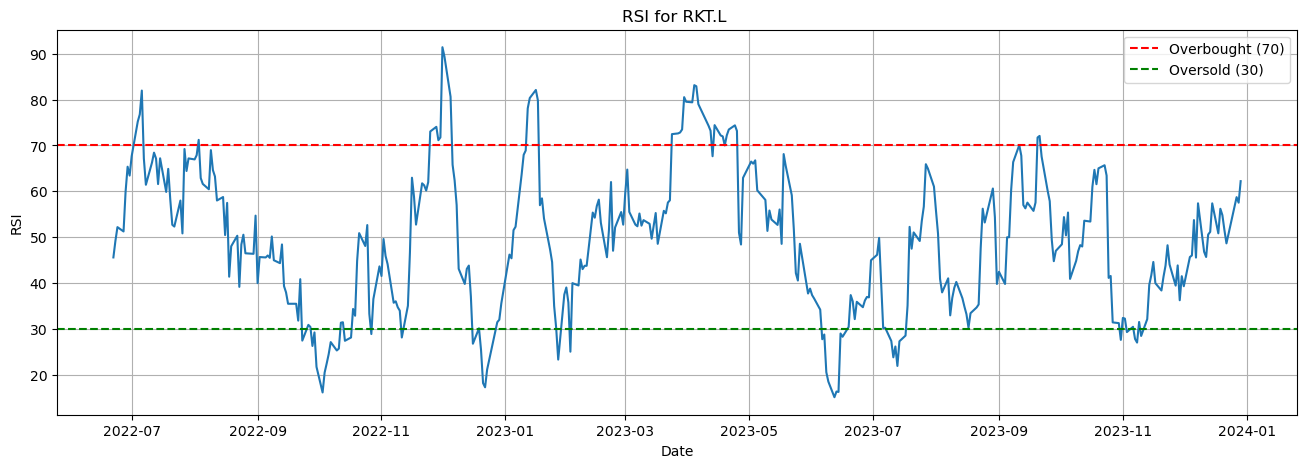

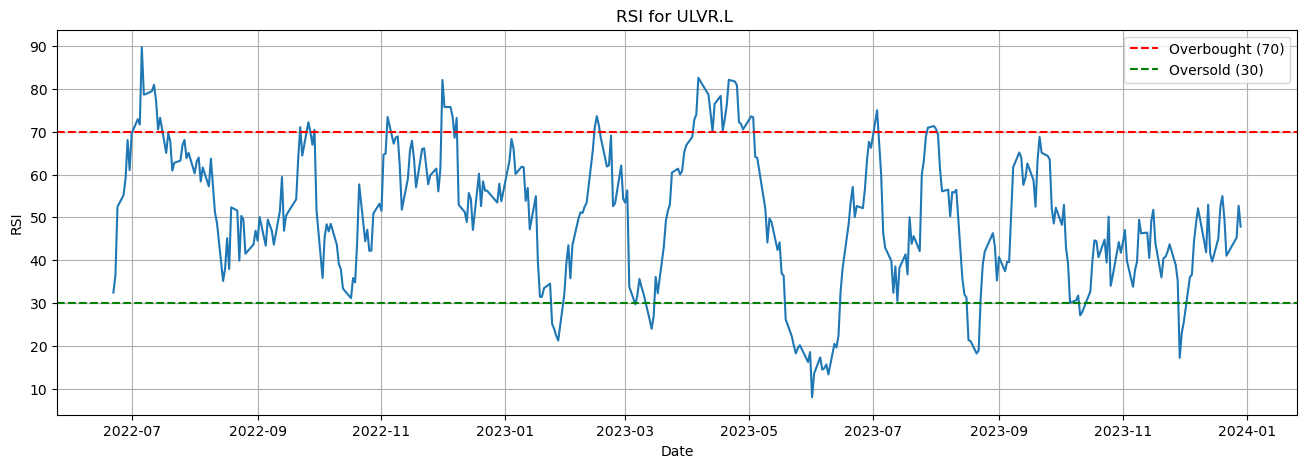

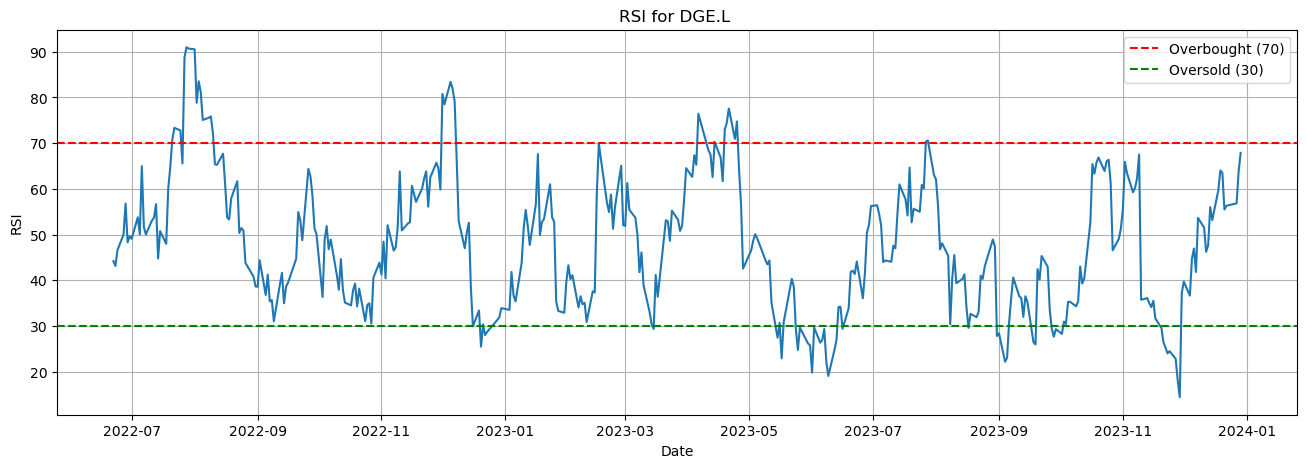

In [18]:
#Plotting RSI for all companies
for file, df in df_s.items():
    plt.figure(figsize=(16, 5))
    plt.plot(df['Date'], df['RSI'])
    plt.title(f"RSI for {file} ")
    plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
    plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend()
    plt.grid(True)
    plt.show()

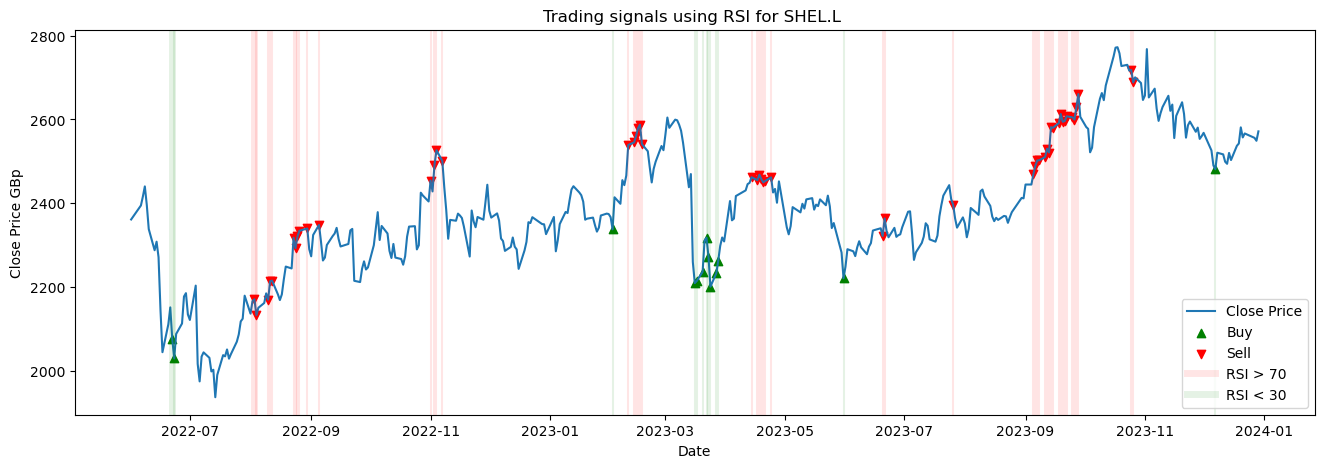

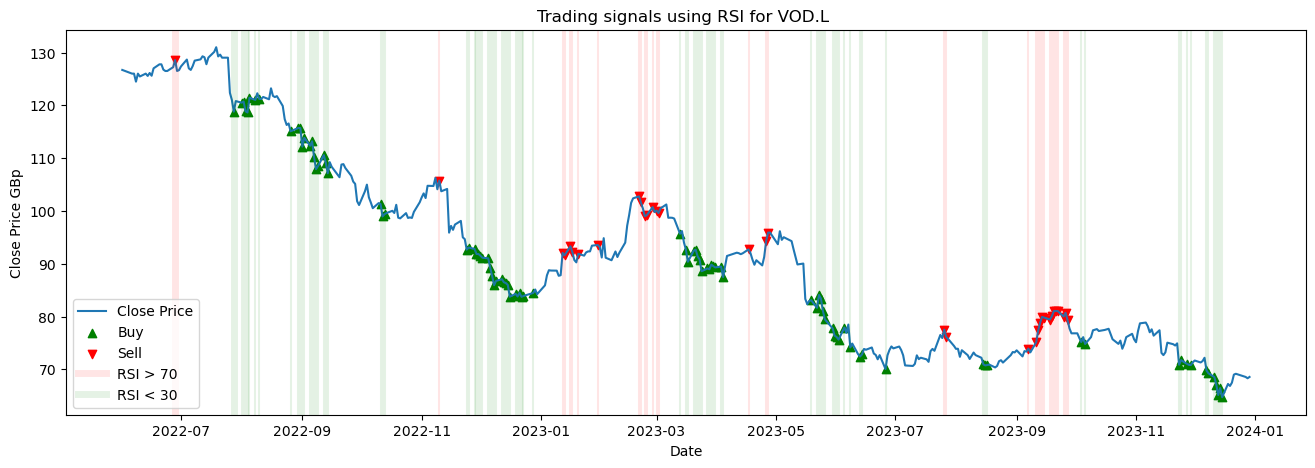

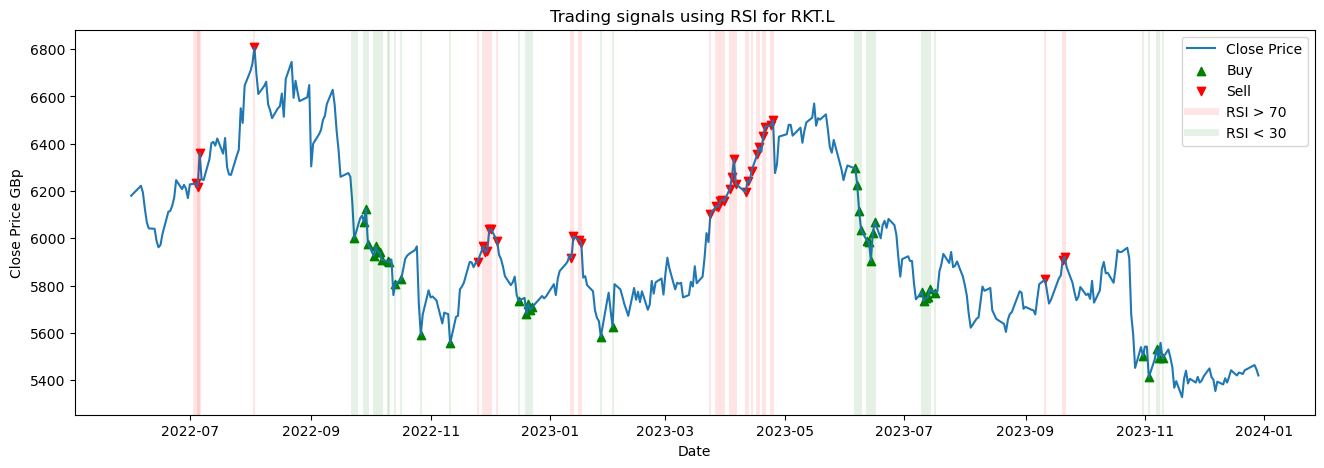

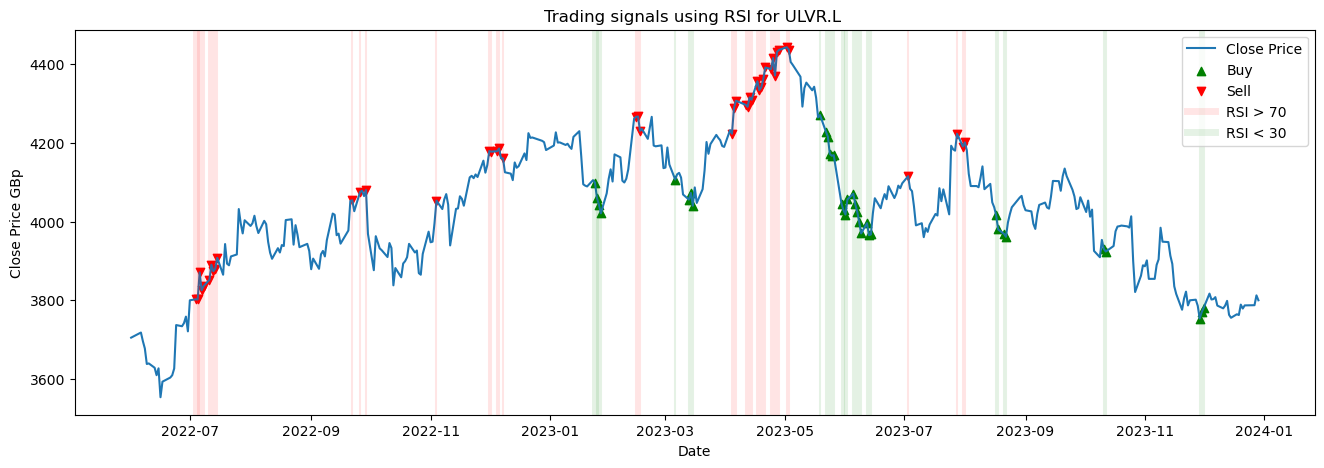

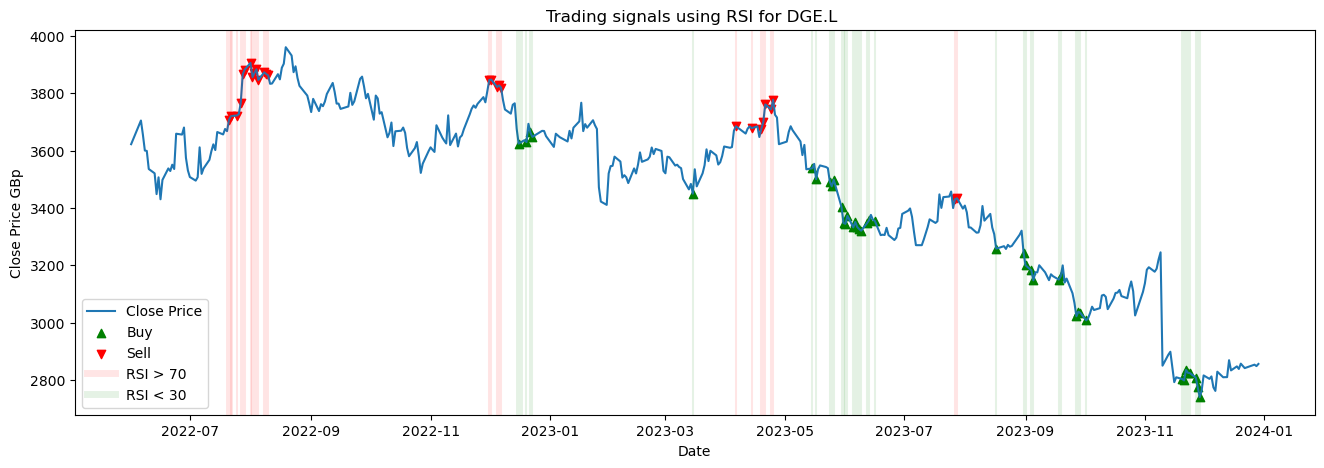

In [19]:
#Plotting RSI  trading signals for all companies
for file, df in df_s.items():
    fig, ax= plt.subplots(figsize=(16,5))
    plt.xlabel("Date")
    plt.ylabel("Close Price GBp")
    plt.title(f"Trading signals using RSI for {file} ")

    ax.plot(df['Date'] , df['Close'],label='Close Price', alpha=1)
    x_axis_buy = df['Close'][df['RSI_signal'] ==1]
    y_axis_buy = df.loc[df['RSI_signal'] == 1]['Date']

    x_axis_sell = df['Close'][df['RSI_signal'] ==-1]
    y_axis_sell = df.loc[df['RSI_signal'] == -1]['Date']

    ax.scatter(y_axis_buy, x_axis_buy, label = 'Buy',marker = '^', color ='green')
    ax.scatter(y_axis_sell,x_axis_sell, label = 'Sell',marker = 'v', color ='red')
    
    #Plotting shaded vertical bars indicating when RSI is below 30 - green or above 70 - red 
    #Getting dates when RSI is above 70 and below 30
    dates_buy = df.loc[df['RSI'] <30]['Date']
    date_sell = df.loc[df['RSI'] > 70]['Date']
    #Red bars when RSI is above 70
    for shade_date in date_sell:
        if shade_date == date_sell.iloc[0]:
            #Adding a label once
            ax.axvline(shade_date, color='red', alpha=0.1,linewidth=5, label='RSI > 70')
        else:
            ax.axvline(shade_date, color='red', alpha=0.1)
    #Green bars when RSI is below 30
    for shade_date in dates_buy:
        if shade_date == dates_buy.iloc[0]:
            #Adding a label once
            ax.axvline(shade_date, color='green', alpha=0.1,linewidth=5, label='RSI < 30')
        else:
            ax.axvline(shade_date, color='green', alpha=0.1)
    
    
    plt.legend()
    plt.show()

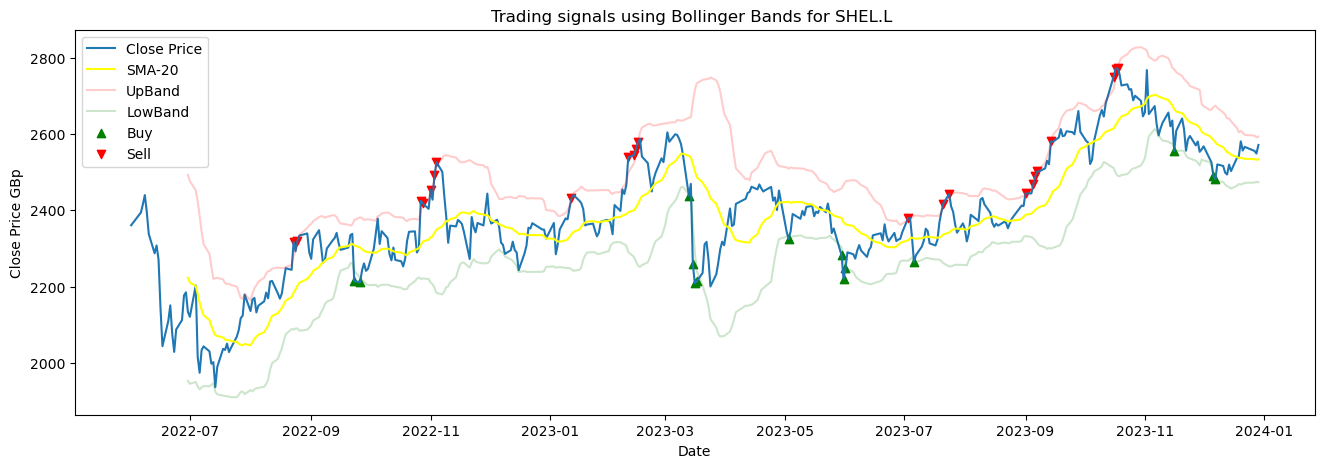

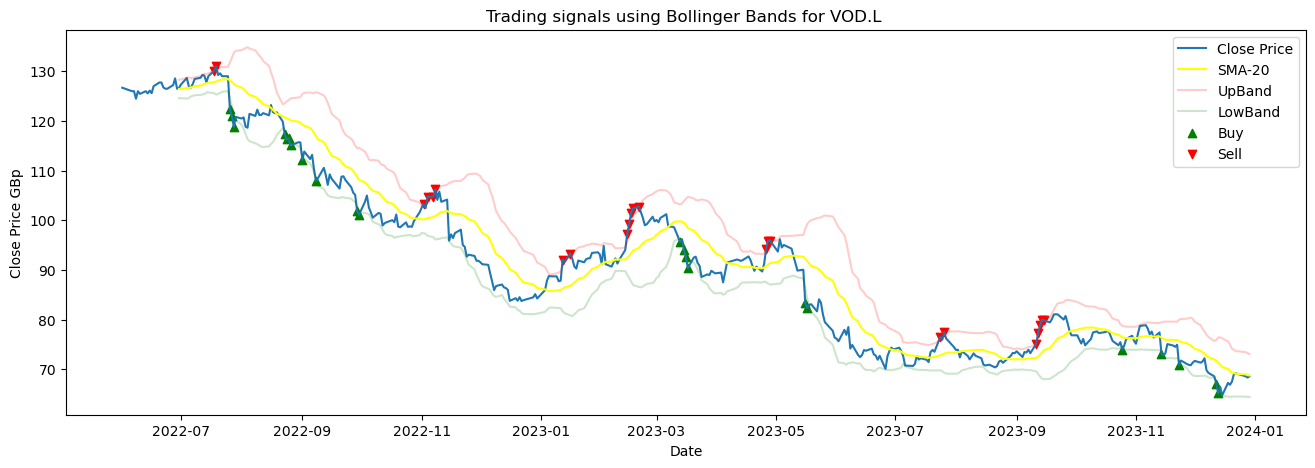

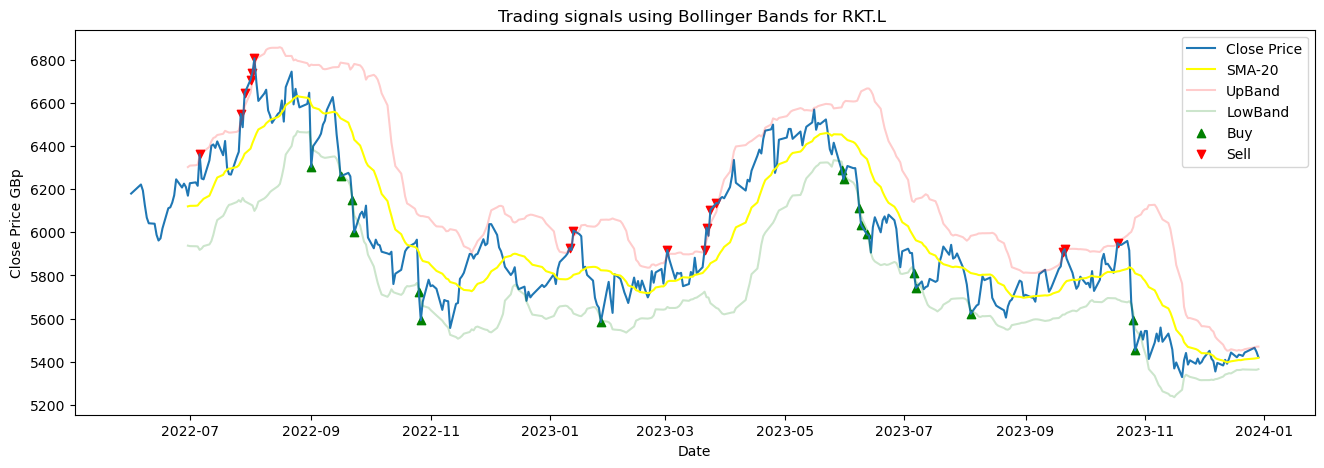

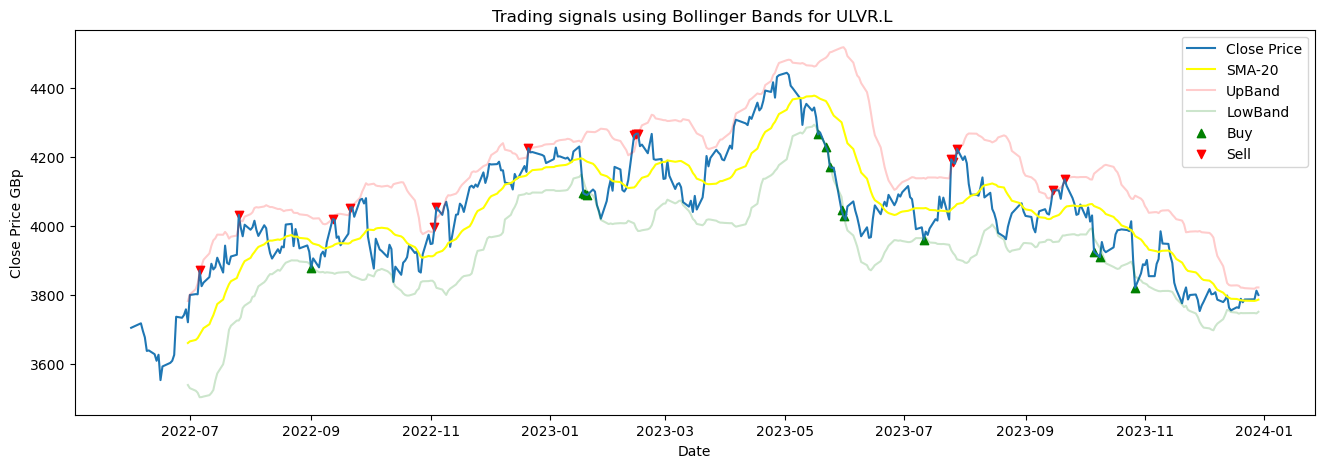

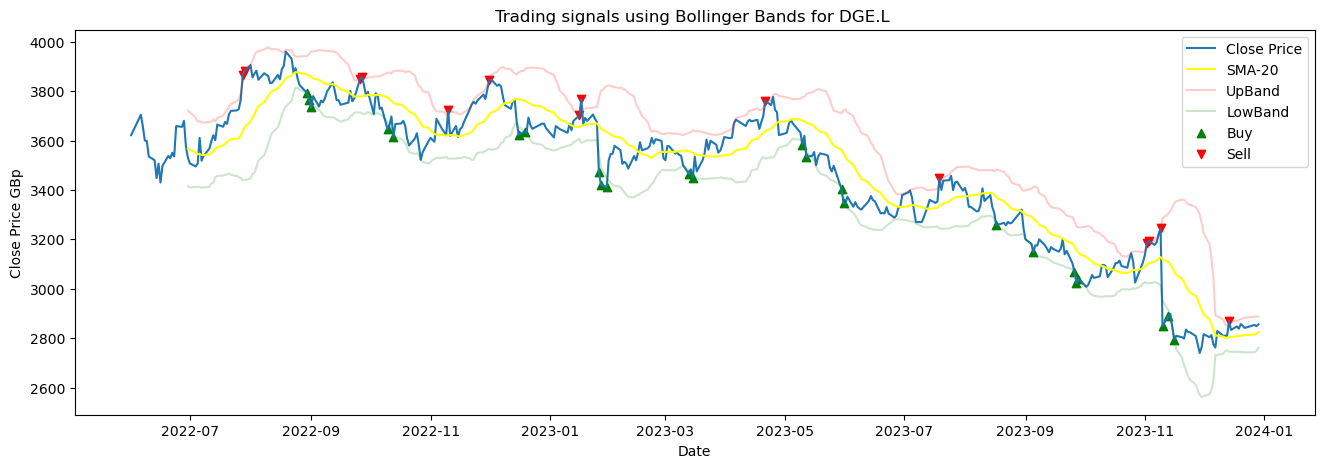

In [20]:
#Plotting  Bollinger band trading signals for all companies

for file, df in df_s.items():
    fig, ax= plt.subplots(figsize=(16,5))
    plt.xlabel("Date")
    plt.ylabel("Close Price GBp")
    plt.title(f"Trading signals using Bollinger Bands for {file} ")

    ax.plot(df['Date'] , df['Close'],label='Close Price', alpha=1)
    ax.plot(df['Date'],df['SMA-20'], label='SMA-20', color='yellow', alpha=1)
    ax.plot( df['Date'], df['UpBand'],label='UpBand', color='red', alpha=0.2)
    ax.plot(df['Date'], df['LowBand'],  label='LowBand', color='green', alpha=0.2)

    x_axis_buy = df['Close'][df['BOL_signal'] ==1]
    y_axis_buy = df.loc[df['BOL_signal'] == 1]['Date']

    x_axis_sell = df['Close'][df['BOL_signal'] ==-1]
    y_axis_sell = df.loc[df['BOL_signal'] == -1]['Date']

    ax.scatter(y_axis_buy, x_axis_buy, label = 'Buy',marker = '^', color ='green')
    ax.scatter(y_axis_sell,x_axis_sell, label = 'Sell',marker = 'v', color ='red')
    
    plt.legend()
    plt.show()

In [21]:
#Testing how profitable the combined RSI and Bollinger Bands strategy is by investing £1000 and then buying/selling stocks 
#with gains from the stock
def find_returns_after_trading(df):
    initial_amount= 1000
    current_amount=initial_amount    
    shares_of_stock = 0
    #when prev_pos is -1 : we sold a share yesterday
    #when prev_pos is 1 : we either bought a share yesterday or we are still holding it

    prev_pos =-1 # we want to buy shares first
    for i, row in df.iterrows():
        
        #Buy shares
        #when RSI_BOL_signal is 1 (buy) and previous position was sell or 
        #previous position was buy/hold and there is profit earned from a bought share previously 
        if row['RSI_BOL_signal'] == 1 and (prev_pos==-1 or (prev_pos==1 and current_amount>0)):
            shares_of_stock += current_amount/(row['Close']/100) 
            prev_pos=1            
           # print(f"Current amount £ : {current_amount}")
           # print(f"Bought on {row['Date']}")
           # print(f"Num of shares {shares_of_stock}")
           # print()
            current_amount=0
            
        #Hold shares 
        elif prev_pos == 1 and row['RSI_BOL_signal'] == 0: 
            # calculating the returns of holding the stock: todays - yesterdays price
            current_amount +=  shares_of_stock*((row['Close']-prev_row['Close'])/100)
            prev_pos=1
            
        #Sell shares
        elif row['RSI_BOL_signal'] == -1 and prev_pos ==1: 
            current_amount += shares_of_stock * (row['Close']/100)
            prev_pos=-1
            #print(f"Current amount £ : {current_amount}")
            #print(f"Sold on {row['Date']}")
            #print(f"Num of shares sold : {shares_of_stock}")
            #print(f"Current amount £ : {current_amount}")
            #print()
            shares_of_stock=0
            
        prev_row = row
        
    #If we still have the shares of stock
    if prev_pos == -1:
        #We want to get the amount we earned by substracting the amount we invested
        current_amount -= initial_amount
    
    precenetage_earned = current_amount*100/initial_amount
    print(f'Initial investment £ {round(initial_amount,2)}')
    print(f'Gain/loss £ {round(current_amount,2)}')
    print(f'Total return in {round(precenetage_earned,2)} %')
    print()

In [22]:
for file, df in df_s.items():
    print(file)
    find_returns_after_trading(df)

SHEL.L
Initial investment £ 1000
Gain/loss £ 45.83
Total return in 4.58 %

VOD.L
Initial investment £ 1000
Gain/loss £ 8.73
Total return in 0.87 %

RKT.L
Initial investment £ 1000
Gain/loss £ 107.56
Total return in 10.76 %

ULVR.L
Initial investment £ 1000
Gain/loss £ 30.74
Total return in 3.07 %

DGE.L
Initial investment £ 1000
Gain/loss £ -117.84
Total return in -11.78 %



### Task 2.4 - Portfolio Analysis

In [23]:
#Converting dictionary into a series
rets = pd.Series(total_cumulative_returns)

In [24]:
# Returns, volatility of a portfolio using EQUAL WEIGHTS
rets = pd.Series(total_cumulative_returns)
weights = np.array(len(files) * [1 / len(files)]) # [0.2,0.2, 0.2, 0.2, 0.2]
expected_return_equal_weights = np.dot(weights,rets)

covariance = df_returns.cov() 
variance = weights.T @ covariance @ weights
std_volatility = np.sqrt(variance) #  standard deviation/volatility since their calculation is the same

print(f"Portfolio with equal weights: \n   mean return of {round(expected_return_equal_weights*100,5)}% \n   variance : {round(variance*100, 5)}% \n   standard deviation/volatility - risk : {round(std_volatility*100,5)}%")

Portfolio with equal weights: 
   mean return of -13.57088% 
   variance : 0.00525% 
   standard deviation/volatility - risk : 0.72461%


In [25]:
#Weights 1: 0 for VOD since returns were -45%, reducing weights for DGE and RKT since they also had neg. returns, 
#increasing weights for SHEL and ULVR which had pos returns
#Weights 2: removing weights for all companies with neg. returns.
weights_adjusted = np.array([[0.5,0, 0.1, 0.3, 0.1], [0.6,0, 0, 0.4, 0]])

for weights in weights_adjusted:
    expected_return_with_weights = np.dot(weights,rets)
    covariance = df_returns.cov() 
    variance = weights.T @ covariance @ weights
    std_volatility = np.sqrt(variance) #  standard deviation/volatility since their calculation is the same
    comp_weights = {}
    for comp, w in zip(files, weights):        
        comp_weights[comp] = w
        
    
    print()
    print(f"Portfolio with adjusted weights {comp_weights}: \n   mean return : {round(expected_return_with_weights*100,5)}% \n   variance : {round(variance*100, 5)}% \n   standard deviation/volatility - risk : {round(std_volatility*100,5)}%")


Portfolio with adjusted weights {'SHEL.L': 0.5, 'VOD.L': 0.0, 'RKT.L': 0.1, 'ULVR.L': 0.3, 'DGE.L': 0.1}: 
   mean return : 1.88246% 
   variance : 0.00858% 
   standard deviation/volatility - risk : 0.92629%

Portfolio with adjusted weights {'SHEL.L': 0.6, 'VOD.L': 0.0, 'RKT.L': 0.0, 'ULVR.L': 0.4, 'DGE.L': 0.0}: 
   mean return : 6.37507% 
   variance : 0.01123% 
   standard deviation/volatility - risk : 1.05967%


Therefore, the most optimal portfolio is with the following weights: {'SHEL.L': 0.6, 'VOD.L': 0.0, 'RKT.L': 0.0, 'ULVR.L': 0.4, 'DGE.L': 0.0} yielding more than 6% in profit with minimal of 1.06 % of risk.